In [ ]:
#!pip install tensorflow

In [4]:
!pip install opencv-python matplotlib

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 11.3 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 11.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 11.4 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.3 MB/s eta

In [1]:
import tensorflow as tf
import os

In [27]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [30]:
# Проверка доступных устройств
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Принудительное использование конкретного устройства
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    tf.config.set_visible_devices(gpu_devices[0], 'GPU')  # Выберите первый GPU
else:
    print("GPU не найден.")

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'C:/dataset'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
os.listdir(data_dir)

['Amanita citrina',
 'Amanita muscaria',
 'Amanita pantherina',
 'Amanita rubescens',
 'Apioperdon pyriforme',
 'Armillaria borealis',
 'Artomyces pyxidatus',
 'Bjerkandera adusta',
 'Boletus edulis',
 'Boletus reticulatus',
 'Calocera viscosa',
 'Calycina citrina',
 'Cantharellus cibarius',
 'Cerioporus squamosus',
 'Cetraria islandica',
 'Chlorociboria aeruginascens',
 'Chondrostereum purpureum',
 'Cladonia fimbriata',
 'Cladonia rangiferina',
 'Cladonia stellaris',
 'Clitocybe nebularis',
 'Coltricia perennis',
 'Coprinellus disseminatus',
 'Coprinellus micaceus',
 'Coprinopsis atramentaria',
 'Coprinus comatus',
 'Crucibulum laeve',
 'Daedaleopsis confragosa',
 'Daedaleopsis tricolor',
 'Evernia mesomorpha',
 'Evernia prunastri',
 'Flammulina velutipes',
 'Fomes fomentarius',
 'Fomitopsis betulina',
 'Fomitopsis pinicola',
 'Ganoderma applanatum',
 'Graphis scripta',
 'Gyromitra esculenta',
 'Gyromitra gigas',
 'Gyromitra infula',
 'Hericium coralloides',
 'Hygrophoropsis aurantiac

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:/dataset\Amanita rubescens\Amanita pantherina


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 77724 files belonging to 100 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

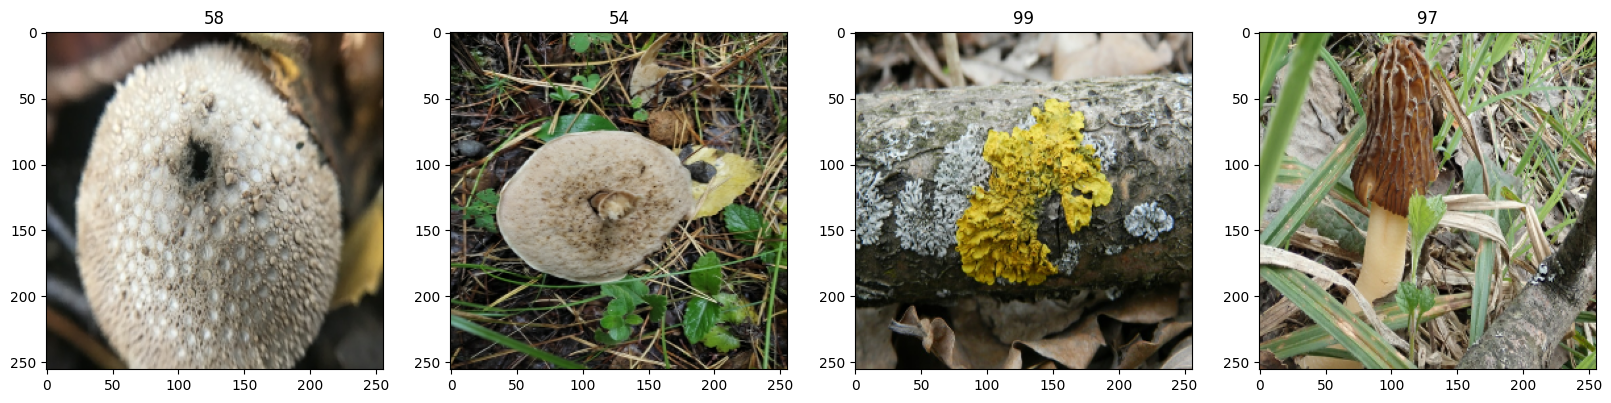

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.11562937, 0.1616382 , 0.09287354],
          [0.19436844, 0.2556033 , 0.17176513],
          [0.14414027, 0.19352752, 0.12375153],
          ...,
          [0.05743648, 0.0593017 , 0.02910868],
          [0.03845676, 0.04237833, 0.02133885],
          [0.05347033, 0.0573919 , 0.03778405]],
 
         [[0.06931787, 0.10046896, 0.04981091],
          [0.07588106, 0.09312218, 0.05472233],
          [0.05558472, 0.06404826, 0.03066897],
          ...,
          [0.03853837, 0.04136795, 0.02288382],
          [0.04798758, 0.05190914, 0.0323013 ],
          [0.05759738, 0.06151895, 0.04191111]],
 
         [[0.07688784, 0.13283877, 0.04843349],
          [0.08267792, 0.13512346, 0.05016192],
          [0.07342332, 0.1352876 , 0.03910193],
          ...,
          [0.04361213, 0.04398451, 0.03502425],
          [0.05321691, 0.05124081, 0.0345818 ],
          [0.06536859, 0.06339249, 0.04673348]],
 
         ...,
 
         [[0.12711798, 0.12866151, 0.11618778],
          [0.06452

In [18]:
data.as_numpy_iterator().next()[0].max()

1.0

In [19]:
train_size = int(len(data)*.7) 
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1 

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

In [22]:
#base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Замораживаем веса

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Уменьшает переобучение
    Dense(100, activation='softmax')])

In [23]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [31]:
logdir = 'C:/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val, 
                 callbacks=[early_stop, reduce_lr, tensorboard_callback])

Epoch 1/20
1700/1700 [==============================] - 103s 60ms/step - loss: 1.4324 - accuracy: 0.5970 - val_loss: 1.1487 - val_accuracy: 0.6678 - lr: 0.0010
Epoch 2/20
1700/1700 [==============================] - 103s 61ms/step - loss: 1.3804 - accuracy: 0.6068 - val_loss: 1.1181 - val_accuracy: 0.6783 - lr: 0.0010
Epoch 3/20
1700/1700 [==============================] - 106s 62ms/step - loss: 1.3407 - accuracy: 0.6141 - val_loss: 1.1237 - val_accuracy: 0.6775 - lr: 0.0010
Epoch 4/20
1700/1700 [==============================] - 145s 85ms/step - loss: 1.2991 - accuracy: 0.6244 - val_loss: 1.1076 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 5/20
1700/1700 [==============================] - 1695s 998ms/step - loss: 1.2662 - accuracy: 0.6317 - val_loss: 1.1008 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 6/20
1700/1700 [==============================] - 104s 61ms/step - loss: 1.2417 - accuracy: 0.6404 - val_loss: 1.0974 - val_accuracy: 0.6851 - lr: 0.0010
Epoch 7/20
1700/1700 [================

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
import cv2
import matplotlib.pyplot as plt

In [42]:
import cv2

img = cv2.imread('C:/mush.jpeg')

if img is None:
    print("Ошибка: изображение не загружено. Проверьте путь к файлу!")
else:
    print("Изображение загружено успешно! Размер:", img.shape)


Изображение загружено успешно! Размер: (194, 259, 3)


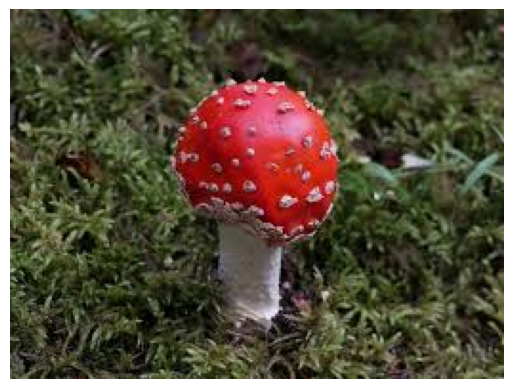

In [44]:
img = cv2.imread('C:/mush.jpeg')

if img is None:
    print("Ошибка: изображение не загружено!")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертация BGR → RGB
    plt.imshow(img)
    plt.axis('off')  # Убираем оси для корректного отображения
    plt.show()

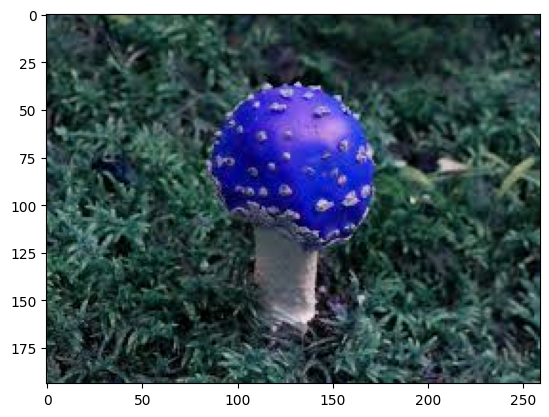

In [45]:
img = cv2.imread('C:/mush.jpeg')
plt.imshow(img)
plt.show()

In [60]:
import cv2
import numpy as np

def preprocess_image(image_path, img_size=256):
    img = cv2.imread(image_path)  # Загружаем изображение
    if img is None:
        raise ValueError("Ошибка загрузки изображения!")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Переводим BGR -> RGB
    img = cv2.resize(img, (img_size, img_size))  # Изменяем размер
    img = img / 255.0  # Нормализация (если использовалась при обучении)
    img = np.expand_dims(img, axis=0)  # Добавляем размерность (1, 224, 224, 3)
    return img

In [69]:
image_path = 'C:/mush6.jpg'  # Укажите путь к тестовому изображению
processed_img = preprocess_image(image_path)

predictions = model.predict(processed_img)  # Получаем предсказания
predicted_class = np.argmax(predictions)  # Индекс класса с максимальной вероятностью
confidence = np.max(predictions)  # Уверенность модели в ответе

print(f"Предсказанный класс: {predicted_class}, уверенность: {confidence:.2f}")


1/1 [==============================] - 0s 19ms/step
Предсказанный класс: 77, уверенность: 0.92


In [70]:
model.save('mushroom_classifier.h5')
